In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions/text.csv


In [1]:
import tensorflow as tf
print("TF GPUs:", tf.config.list_physical_devices('GPU'))


2025-05-16 15:50:45.662037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747410645.925325      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747410646.003524      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TF GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import torch

if torch.cuda.is_available():
    print("CUDA is available ✅")
    print("Device Name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is NOT available ❌")


CUDA is available ✅
Device Name: Tesla P100-PCIE-16GB


In [5]:
df=pd.read_csv("/kaggle/input/emotions/text.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [6]:
df.head(10)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
5,5,i was beginning to feel quite disheartened,0
6,6,i would think that whomever would be lucky eno...,2
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
9,9,i can still lose the weight without feeling de...,0


In [7]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [7]:
import re

In [8]:
# Data Cleaning:-

def clean_text(text):
   text= re.sub(r'<.*?>'," ",text)
   text= re.sub(r'@\w+'," ",text)
   text= re.sub(r'http\S+|www\.\S+'," ",text)
   text=re.sub(r'\[.*?\]'," ",text)
   text=re.sub('r[^a-zA-Z\s]'," ",text)
   text= re.sub(r'\d+'," ",text)
   text=text.lower()
   text= " ".join(text.split())
   return text

df["clean_text"]=df["text"].apply(clean_text)

In [10]:
df.head(20)

,Unnamed: 0,text,label,clean_text
0,0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...
3,3,i dont know i feel so lost,0,i dont know i feel so lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...
5,5,i was beginning to feel quite disheartened,0,i was beginning to feel quite disheartened
6,6,i would think that whomever would be lucky eno...,2,i would think that whomever would be lucky eno...
7,7,i fear that they won t ever feel that deliciou...,1,i fear that they won t ever feel that deliciou...
8,8,im forever taking some time out to have a lie ...,5,im forever taking some time out to have a lie ...
9,9,i can still lose the weight without feeling de...,0,i can still lose the weight without feeling de...


In [9]:
#Tokenization and Lemmatization:

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer= WordNetLemmatizer()

def tokenize_and_lemm(text):
    tokens= word_tokenize(text)
    lem_tokens= [lemmatizer.lemmatize(token,pos="v") for token in tokens]
    return " ".join(lem_tokens)
    
df["clean_text"]= df["clean_text"].apply(tokenize_and_lemm)

In [12]:
df.head(20)

,Unnamed: 0,text,label,clean_text
0,0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoy be able to slouch about relax and un...
2,2,i gave up my internship with the dmrg and am f...,4,i give up my internship with the dmrg and be f...
3,3,i dont know i feel so lost,0,i dont know i feel so lose
4,4,i am a kindergarten teacher and i am thoroughl...,4,i be a kindergarten teacher and i be thoroughl...
5,5,i was beginning to feel quite disheartened,0,i be begin to feel quite dishearten
6,6,i would think that whomever would be lucky eno...,2,i would think that whomever would be lucky eno...
7,7,i fear that they won t ever feel that deliciou...,1,i fear that they win t ever feel that deliciou...
8,8,im forever taking some time out to have a lie ...,5,im forever take some time out to have a lie do...
9,9,i can still lose the weight without feeling de...,0,i can still lose the weight without feel deprive


In [10]:
# Vectorization using Tf-idf Vectorizer:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer(max_features=5000, stop_words="english")

x= tfidf_vectorizer.fit_transform(df["clean_text"])
y= df["label"]
x.shape 

(416809, 5000)

In [16]:
# Importing libraries:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)


In [15]:
# Applying Machine Learning Models:-
## Using Logistic Regression Model:

logreg= LogisticRegression(max_iter=1000, multi_class="ovr")

logreg.fit(X_train,y_train)
y_pred= logreg.predict(X_test)

accuracy= accuracy_score(y_pred,y_test)
classification_rep = classification_report(y_test, y_pred)
accuracy, classification_rep

(0.8827883208176387,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.92      0.92     24201\n           1       0.89      0.92      0.91     28164\n           2       0.80      0.71      0.75      6929\n           3       0.90      0.89      0.89     11441\n           4       0.85      0.84      0.84      9594\n           5       0.75      0.70      0.72      3033\n\n    accuracy                           0.88     83362\n   macro avg       0.85      0.83      0.84     83362\nweighted avg       0.88      0.88      0.88     83362\n')

In [17]:
accuracy

0.8827883208176387

In [16]:
y_test.shape

(83362,)

In [17]:
X_test.shape

(83362, 5000)

In [18]:
## USING SVM MODEL:

from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

x_small=x[:5000]
y_small=y[:5000]

X_train,X_test,y_train,y_test= train_test_split(x_small,y_small,test_size=0.2,random_state=42)

svm_model= SVC(kernel="linear")

svm_model.fit(X_train,y_train)
y_pred= svm_model.predict(X_test)

acc= accuracy_score(y_test,y_pred)
report= classification_report(y_test,y_pred)

In [19]:
acc

0.797

In [20]:
X_test.shape

(1000, 5000)

In [21]:
y_test.shape

(1000,)

In [22]:
## USING DECISION TREE MODEL:

from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print('Decision Tree model has been trained.')

Decision Tree model has been trained.


In [23]:
from sklearn.metrics import accuracy_score

y_pred=clf.predict(X_test)

accu= accuracy_score(y_test,y_pred)
accu

0.8072503058947722

In [24]:
y_test.shape

(83362,)

In [26]:
## USING RANDOM FOREST MODEL:

from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train,y_train)
print("Random Forest model on Emotions dataset has been trained")

Random Forest model on Emotions dataset has been trained


In [28]:
rf_y_pred= rf_clf.predict(X_test)

acc_rf_clf= accuracy_score(y_test,rf_y_pred)


In [29]:
acc_rf_clf

0.8399390609630287

In [40]:
df["label"].unique()

array([4, 0, 2, 1, 5, 3])

In [15]:
## USING KNN MODEL:

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
y_pred


array([0, 1, 3, ..., 1, 1, 1])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6458818166550706

In [26]:
df["text"][10]

'i try to be nice though so if you get a bitchy person on the phone or at the window feel free to have a little fit and throw your pen at her face'

In [21]:
import tensorflow as tf
from tensorflow import keras
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(5000,),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(6,activation='softmax')
])
    
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
model.fit(X_train, y_train, epochs=6, batch_size=64, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747321347.320596      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/6


I0000 00:00:1747321350.468667      97 service.cc:148] XLA service 0x7c894c00b590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747321350.469318      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747321350.673019      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/4690 ━━━━━━━━━━━━━━━━━━━━ 3:54:15 3s/step - accuracy: 0.0625 - loss: 1.7992

I0000 00:00:1747321352.018509      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4690/4690 ━━━━━━━━━━━━━━━━━━━━ 255s 54ms/step - accuracy: 0.7764 - loss: 0.6100 - val_accuracy: 0.8833 - val_loss: 0.2507
Epoch 2/6
4690/4690 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8927 - loss: 0.2529 - val_accuracy: 0.8844 - val_loss: 0.2431
Epoch 3/6
4690/4690 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8991 - loss: 0.2235 - val_accuracy: 0.8848 - val_loss: 0.2416
Epoch 4/6
4690/4690 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9047 - loss: 0.2068 - val_accuracy: 0.8816 - val_loss: 0.2476
Epoch 5/6
4690/4690 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9087 - loss: 0.1947 - val_accuracy: 0.8803 - val_loss: 0.2568
Epoch 6/6
4690/4690 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9107 - loss: 0.1873 - val_accuracy: 0.8812 - val_loss: 0.2607


In [22]:
# Evaluate
test_loss, test_acc= model.evaluate(X_test,y_test)


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8812 - loss: 0.2579


In [23]:
test_acc

0.8808090090751648

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         320,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 973,844 (3.71 MB)

 Trainable params: 324,614 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 649,230 (2.48 MB)

In [34]:
print(x.shape)

(416809, 5000)


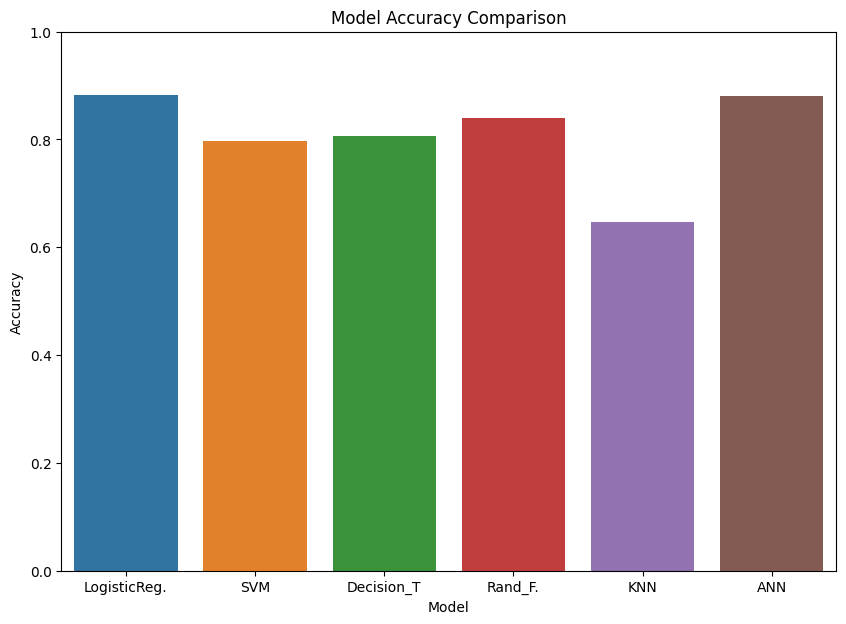

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Model": ["LogisticReg.", "SVM", "Decision_T", "Rand_F.","KNN", "ANN"],
    "Accuracy": [0.8827, 0.797, 0.8072, 0.8399,0.6458,0.8808]
}

df_results = pd.DataFrame(results)

plt.figure(figsize=(10,7))
sns.barplot(data=df_results, x="Model", y="Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

In [ ]:
# Overall Logistic Regression and ANN Models are performed well on Dataset as compared to other models.